In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Use pandas to read data
data = pd.read_csv('data_square.csv').values
N = data.shape[0]
print(f"Number of data: {N}\n")
print(f"{data[0:5]} \n...")

Number of data: 30

[[  30.     -100.    ]
 [  32.4138 -190.725 ]
 [  34.8276 -269.798 ]
 [  37.2414 -337.218 ]
 [  39.6552 -392.985 ]] 
...


In [6]:
X = data[:, 0].reshape(1,N).T
y = data[:, 1]
print(X.shape)
print(y.shape)

(30, 1)
(30,)


In [7]:
# Building Xbar for bias trick
one = np.ones(( N , 1))
Xbar = np.concatenate((one, X, X*X), axis = 1) # each point is one row
print(Xbar)

[[1.00000000e+00 3.00000000e+01 9.00000000e+02]
 [1.00000000e+00 3.24138000e+01 1.05065443e+03]
 [1.00000000e+00 3.48276000e+01 1.21296172e+03]
 [1.00000000e+00 3.72414000e+01 1.38692187e+03]
 [1.00000000e+00 3.96552000e+01 1.57253489e+03]
 [1.00000000e+00 4.20690000e+01 1.76980076e+03]
 [1.00000000e+00 4.44828000e+01 1.97871950e+03]
 [1.00000000e+00 4.68966000e+01 2.19929109e+03]
 [1.00000000e+00 4.93103000e+01 2.43150569e+03]
 [1.00000000e+00 5.17241000e+01 2.67538252e+03]
 [1.00000000e+00 5.41379000e+01 2.93091222e+03]
 [1.00000000e+00 5.65517000e+01 3.19809477e+03]
 [1.00000000e+00 5.89655000e+01 3.47693019e+03]
 [1.00000000e+00 6.13793000e+01 3.76741847e+03]
 [1.00000000e+00 6.37931000e+01 4.06955961e+03]
 [1.00000000e+00 6.62069000e+01 4.38335361e+03]
 [1.00000000e+00 6.86207000e+01 4.70880047e+03]
 [1.00000000e+00 7.10345000e+01 5.04590019e+03]
 [1.00000000e+00 7.34483000e+01 5.39465277e+03]
 [1.00000000e+00 7.58621000e+01 5.75505822e+03]
 [1.00000000e+00 7.82759000e+01 6.127116

In [8]:
# Calculating weights of the fitting line
# np.dot() dot product - phep nhan vo huong

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
# weights
w_0, w_1, w_2 = w[0], w[1], w[2]

print(f"5 first values of Xbar:\n\n{Xbar[0:5]}")
print(f"weight:\n\n{w.shape}")

5 first values of Xbar:

[[1.00000000e+00 3.00000000e+01 9.00000000e+02]
 [1.00000000e+00 3.24138000e+01 1.05065443e+03]
 [1.00000000e+00 3.48276000e+01 1.21296172e+03]
 [1.00000000e+00 3.72414000e+01 1.38692187e+03]
 [1.00000000e+00 3.96552000e+01 1.57253489e+03]]
weight:

(3,)


In [9]:
print(w)

[ 2.00000579e+03 -1.00000222e+02  1.00000199e+00]


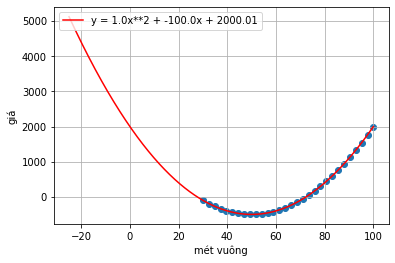

In [10]:
xs = np.linspace(-25, 100, 1000)
ys = w_2*xs*xs + w_1*xs + w_0
plt.scatter(data[:, 0].reshape(-1, 1), data[:, 1].reshape(-1, 1))
plt.xlabel('mét vuông')
plt.ylabel('giá')
plt.plot(xs, ys, '-r', label=f'y = {round(w_2, 2)}x**2 + {round(w_1, 2)}x + {round(w_0, 2)}')
plt.legend(loc='upper left')
plt.grid()
plt.show()
